# Problem 2

A photon moving at speed 1 in the x-y plane starts at time t = 0 at
(x, y) = (1/2, 1/10) heading due east. Around every integer lattice point
(i, j) in the plane, a circular mirror of radius 1/3 has been erected. How
far from (0, 0) is the photon at t = 10?

### Some geometry
Let the position of the photon be $ P = (p_x, p_y) $ with velocity $ \vec{v} = \langle v_x, v_y \rangle $, and suppose it is bouncing off a circle with center $ C = (c_x, c_y) $ with radius r.

We first find the intersection point of the photon and the circle. Since we have that the ray can be represented parametrically as $ r(t) = \langle p_x + v_x t, p_y + v_y t\rangle$, we can solve for t as follows:


$ (x - c_x)^2 + (y - c_y) ^ 2 = r^2 $

$ \implies (p_x + v_x t - c_x)^2 + (p_y + v_y t - c_y) ^ 2 = r^2 $

$ \implies t^2 (v_x^2 + v_y^2) + 2 t (p_x v_x + p_y v_y - c_x v_x - c_y v_y) + (c_x^2 + c_y^2 - 2 c_x p_x - 2 c_y p_y + p_x^2 + p_y^2 - r^2) = 0 $

We define variables A,B,C such that the above quadratic is $ A t^2 + B t + C = 0 $

$ \implies t_{int} = \min(\frac{-B+(B^2-4AC)^{1/2}}{2A}, \frac{-B-(B^2-4AC)^{1/2}}{2A}) $

Note: if this quadratic has 2 complex roots, then there is no intersection points

We thus can get the intersection point of the ray and the circular mirror $p_{int} = (p_x + v_x t_{int}, p_y + v_y   t_{int}) $

To get the velocity of the photon after reflection, let $\overrightarrow{Cp_{int}}$ be the vector from the center from the center of the circle to the intersection point. Then, the initial velocity vector can be split up into a component parallel to $\overrightarrow{Cp_{int}}$ and a component perpendicular to $\overrightarrow{Cp_{int}}$ as follows:

$ \vec{v} = \vec{v_{\parallel}} + \vec{v_{\perp}}$

$ \vec{v_{\parallel}} = proj_{\overrightarrow{Cp_{int}}} \vec{v} = \frac{\vec{v} \cdot \overrightarrow{Cp_{int}}}{|\overrightarrow{Cp_{int}}|^2}   \overrightarrow{Cp_{int}} $

The reflected vector is thus $ \vec{v_{\perp}} - \vec{v_{\parallel}} = \vec{v} - 2 \frac{\vec{v} \cdot \overrightarrow{Cp_{int}}}{|\overrightarrow{Cp_{int}}|^2}   \overrightarrow{Cp_{int}} $

Let's code this (again, using mpmath for extended precision):

In [1]:
from mpmath import sqrt, mp, mpf
class Vector(list):
    def __add__(self, other):
        return Vector([self[i]+other[i] for i in range(len(self))])
    def __sub__(self, other):
        return Vector([self[i]-other[i] for i in range(len(self))])
    def __mul__(self,other):
        return Vector([self[i]*other for i in range(len(self))])
    def __repr__(self):
        return "("+",".join([str(i) for i in self])+")"
    def dot(self, other):
        return sum([self[i]*other[i] for i in range(len(self))])
    def norm(self):
        return sqrt(self.dot(self))
def reflect(P, v, C, r):
    px, py = P
    vx, vy = v
    cx, cy = C
    a = vx*vx + vy*vy
    b = 2*(px*vx+py*vy-cx*vx-cy*vy)
    c = cx*cx+cy*cy-2*cx*px-2*cy*py+px*px+py*py-r*r
    t1,t2 = (-b+sqrt(b*b-4*a*c))/(2*a), (-b-sqrt(b*b-4*a*c))/(2*a)
    potential_t = [t for t in (t1,t2) if t.imag == 0]
    if len(potential_t) == 0: return None # there is no intersection
    else: t_int = min(potential_t)
    p_int = (px+vx*t_int, py+vy*t_int)
    px, py = p_int
    ray = Vector([cx-px, cy-py]) # ray from center of circle to intersection point
    v = Vector(list(v))
    v_out = v - ray * (2*(v.dot(ray)/ray.dot(ray)))
    return (t_int, Vector(p_int), Vector(v_out))
# Sanity check: 
# let P = (5,0), v = (-1,0), C = (0,0), r = 2
assert reflect((5,0),(-1,0),(0,0),2) == (mpf(3), Vector([mpf(2),mpf(0)]), Vector([mpf(1),mpf(0)]))
# Test the case when there is no intersection
assert reflect((2,0),(0,-1),(0,0),1) == None

Now, once we get a new intersection point and new velocity, we need to find the next circular mirror that the photon will hit. We do this by stepping in the path of the ray until we get a hit. Our step size here will be 1/2 (i.e. each step, we travel a distance of 1/2)

In [2]:
def get_next_hit(t, P, v):
    unit_v = v * (1/sqrt(v.dot(v)))
    step_v = v * 0.5
    for i in range(10):
        circle_center = list(map(round, P + step_v * i))
        reflection = reflect(P, v, circle_center, mpf("1/3"))
        if reflection:
            t_elapsed, P_int, v_out = reflection
            if t_elapsed > 0: return (t-t_elapsed, P_int, v_out)
def run(prec, t = mpf("10"),P = Vector([mpf("1/2"),mpf("1/10")]),v = Vector([1,0])):
    mp.dps = prec
    hits = [(t,P,v)]
    while t > 0:
        #print(t,P,v)
        hits.append(get_next_hit(t, P, v))
        t,P,v = hits[-1]
    t_final, P_final, v_final = hits[-2]
    return (P_final + v_final*t_final).norm()

In [3]:
for i in range(1,50):
    print(i,run(i))

1 5.0
2 3.3
3 1.77
4 2.485
5 0.60295
6 0.511265
7 0.6023734
8 1.0711874
9 0.588514518
10 0.450491135
11 1.0432649685
12 0.990610230791
13 0.9951210896558
14 0.99524999610906
15 0.995266103153848
16 0.9952620629139262
17 0.9952625696076205
18 0.995262573379409086
19 0.9952625750832006963
20 0.99526257519648864278
21 0.995262575201553726633
22 0.9952625752043971276951
23 0.99526257520437282485727
24 0.995262575204398870475911
25 0.9952625752044014377352827
26 0.99526257520440139003454767
27 0.995262575204401360995693223
28 0.9952625752044013655541568784
29 0.99526257520440136608107105557
30 0.995262575204401366072338073386
31 0.9952625752044013660681864956526
32 0.99526257520440136606875240385247
33 0.995262575204401366068725458980922
34 0.99526257520440136606872190352659
35 0.99526257520440136606872189699880236
36 0.995262575204401366068721891660767682
37 0.9952625752044013660687218957344472808
38 0.99526257520440136606872189580185936626
39 0.99526257520440136606872189582249080045
40 0.

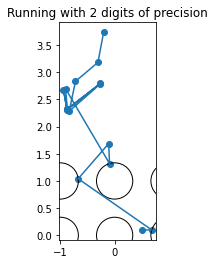

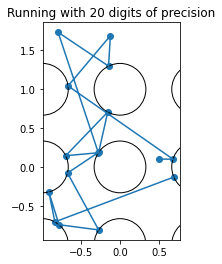

In [4]:
import matplotlib.pyplot as plt
# Generate the hits
def plot(prec):
    mp.dps = prec
    t = mpf("10")
    P = Vector([mpf("1/2"),mpf("1/10")])
    v = Vector([1,0])
    hits = [(t,P,v)]
    while t > 0:
        #print(t,P,v)
        hits.append(get_next_hit(t, P, v))
        t,P,v = hits[-1]
    hit_points = [i[1] for i in hits]
    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    centers = [(x,y) for x in [-1,0,1] for y in [-1,0,1]]
    for c in centers:
        circle = plt.Circle(c, 1./3, fill=False)
        ax.add_artist(circle)
    plt.scatter([i[0] for i in hit_points],[i[1] for i in hit_points])
    plt.plot([i[0] for i in hit_points],[i[1] for i in hit_points])
    plt.title("Running with " + str(prec) + " digits of precision")
    plt.show()
plot(2)
plot(20)

As we can see from the above plots, it is very important for us to use high precision - otherwise the inaccuracies compound rapidly.

In [5]:
run(20)

mpf('0.9952625751964886427757')